In [1]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.preprocessing import normalize
import os
os.chdir("D:/Term-2/MachineLearning/25-02-2019(DecisionTree)")

In [22]:
?RandomForestClassifier
?AdaBoostClassifier

In [2]:
data=pd.read_csv("dt_data.csv")
data.head()

,A,B,C,D,class
0,4.8,3.4,1.9,0.2,positive
1,5.0,3.0,1.6,1.2,positive
2,5.0,3.4,1.6,0.2,positive
3,5.2,3.5,1.5,0.2,positive
4,5.2,3.4,1.4,0.2,positive


In [3]:
y= data['class']
x=data.drop('class',axis=1)

In [4]:
mod = DecisionTreeClassifier(criterion='entropy')
mod.fit(x,y)
ypred = mod.predict(x)


In [5]:
from sklearn.tree import export_graphviz
export_graphviz(mod,out_file='tree1.dot',feature_names=['A','B','C','D'])

# K-MEANS cLUSTERING

In [6]:
cust=pd.read_csv("CC_DATA.csv")

In [7]:
cust_id = cust['CUST_ID']
cust.drop('CUST_ID',axis=1,inplace=True)

In [8]:
type(cust)

pandas.core.frame.DataFrame

In [9]:
from sklearn.cluster import KMeans

In [10]:
cust.isnull().sum()
cust.dropna(inplace=True)
cust.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [11]:
cust = normalize(cust)

In [12]:
cust

array([[3.93529208e-02, 7.87219116e-04, 9.17897286e-02, ...,
        1.34230246e-01, 0.00000000e+00, 1.15458778e-02],
       [2.93875725e-01, 8.34231054e-05, 0.00000000e+00, ...,
        9.84037362e-02, 2.03922922e-05, 1.10118488e-03],
       [3.10797802e-01, 1.24560826e-04, 9.63066935e-02, ...,
        7.81351110e-02, 0.00000000e+00, 1.49472991e-03],
       ...,
       [2.27729209e-02, 8.11047126e-04, 1.40538302e-01, ...,
        8.02142497e-02, 2.43314235e-04, 5.83954164e-03],
       [2.65239400e-02, 1.64244246e-03, 0.00000000e+00, ...,
        1.09890537e-01, 4.92732934e-04, 1.18255904e-02],
       [1.86405379e-01, 3.33425336e-04, 5.46775599e-01, ...,
        4.41566401e-02, 0.00000000e+00, 3.00082652e-03]])

In [105]:
type(cust)

numpy.ndarray

In [13]:
mod = KMeans(n_clusters = 3)
modfit = mod.fit(cust)
clu=modfit.predict(cust)

In [14]:
clust=clu.reshape([-1,1])

In [15]:
new_data=np.concatenate((cust,clust),axis=1)

In [16]:
new_data.shape

(8636, 18)

In [17]:
cent = modfit.cluster_centers_

In [18]:
cent

array([[4.54842842e-01, 2.66973781e-04, 5.94341532e-02, 3.07964876e-02,
        2.86971506e-02, 2.82014962e-01, 6.82129905e-05, 2.28917796e-05,
        4.81062540e-05, 5.88931763e-05, 1.25473268e-03, 1.34661048e-03,
        6.50235422e-01, 2.42765191e-01, 2.21349895e-01, 3.34279358e-06,
        3.18050724e-03],
       [8.65730418e-02, 2.40694410e-04, 1.32596326e-01, 5.54366940e-02,
        7.72669454e-02, 2.54859903e-02, 1.73531733e-04, 3.55285394e-05,
        1.40416410e-04, 8.29729032e-06, 1.31421299e-04, 2.98803156e-03,
        9.34387220e-01, 1.64579338e-01, 5.48273232e-02, 7.85516916e-05,
        3.47261879e-03],
       [1.66612098e-01, 2.34665064e-04, 3.69526024e-01, 2.11071646e-01,
        1.58589379e-01, 7.90776539e-02, 1.78237773e-04, 7.63686276e-05,
        1.31255688e-04, 1.77136853e-05, 3.68924847e-04, 5.38085983e-03,
        5.54492031e-01, 4.86019733e-01, 1.08603373e-01, 6.44877908e-05,
        3.06153683e-03]])

In [19]:
#whether the choosen K is correct?
#solution  is K elbow and silhouts score
clusster_error=[]
from sklearn.metrics import silhouette_score
for i in range(1,6):
    mod = KMeans(n_clusters=i,random_state=0)
    modfit=mod.fit(cust)
    clu=modfit.predict(cust)
    #score=silhouette_score(cust,clu)
    clusster_error.append(modfit.inertia_)
    print("for k {} cluster is {}".format(i,clusster_error[i-1]))

for k 1 cluster is 2139.4398176979953
for k 2 cluster is 1558.5891605371185
for k 3 cluster is 1198.7758885465373
for k 4 cluster is 977.0483653494208
for k 5 cluster is 835.9221997904444


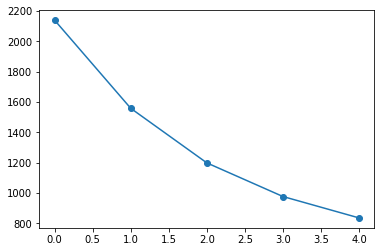

In [21]:
import matplotlib.pyplot as plt
plt.plot(clusster_error,'-o')

In [22]:
from sklearn.decomposition import PCA
pcamod = PCA(2)
pcadata=pcamod.fit_transform(cust)
pca

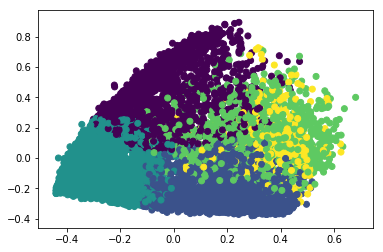

In [24]:
plt.scatter(pcadata[:,0],pcadata[:,1],c=clu)